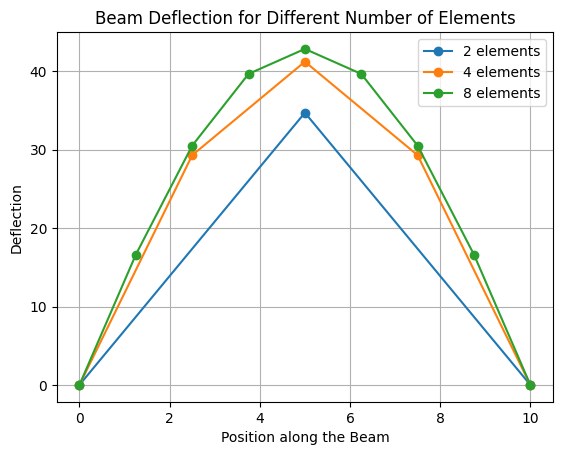

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10  # Length of the beam
EI = 3  # Flexural rigidity
q = 1   # Uniform load

# Number of elements (try 2, 4, 8)
num_elements_list = [2, 4, 8]

for ne in num_elements_list:
    # Discretization
    n_nodes = ne + 1
    le = L / ne  # Length of each element

    # Global stiffness matrix and force vector
    K_global = np.zeros((2 * n_nodes, 2 * n_nodes))
    F_global = np.zeros(2 * n_nodes)

    # Element stiffness matrix for a beam element (Euler-Bernoulli beam theory)
    Ke = (EI / le**3) * np.array([[12, 6*le, -12, 6*le],
                                  [6*le, 4*le**2, -6*le, 2*le**2],
                                  [-12, -6*le, 12, -6*le],
                                  [6*le, 2*le**2, -6*le, 4*le**2]])

    # Element force vector (due to uniform load q)
    Fe = (q * le / 2) * np.array([1, le/6, 1, le/6])

    # Assembly of global matrices
    for i in range(ne):
        # Global indices for the current element
        idx = [2*i, 2*i+1, 2*i+2, 2*i+3]

        # Assemble stiffness matrix
        K_global[np.ix_(idx, idx)] += Ke

        # Assemble force vector
        F_global[idx] += Fe

    # Apply boundary conditions (Simply supported: w=0, M=0)
    # Modify stiffness matrix and force vector
    # For simply supported beam: first and last nodes are constrained
    K_global[0, :] = 0
    K_global[:, 0] = 0
    K_global[0, 0] = 1

    K_global[-2, :] = 0
    K_global[:, -2] = 0
    K_global[-2, -2] = 1

    F_global[0] = 0
    F_global[-2] = 0

    # Solve the system of equations
    w = np.linalg.solve(K_global, F_global)

    # Extract deflection (w) from the displacement vector
    w_deflection = w[::2]

    # Plot the deflection
    x = np.linspace(0, L, n_nodes)
    plt.plot(x, w_deflection, '-o', label=f'{ne} elements')

# Plot formatting
plt.title('Beam Deflection for Different Number of Elements')
plt.xlabel('Position along the Beam')
plt.ylabel('Deflection')
plt.legend()
plt.grid(True)
plt.show()


Number of elements: 2
Deflection at nodes: [ 0.         34.72222222  0.        ]
Number of elements: 4
Deflection at nodes: [ 0.         29.296875   41.23263889 29.296875    0.        ]
Number of elements: 8
Deflection at nodes: [ 0.         16.61512587 30.51757812 39.67285156 42.86024306 39.67285156
 30.51757813 16.61512587  0.        ]


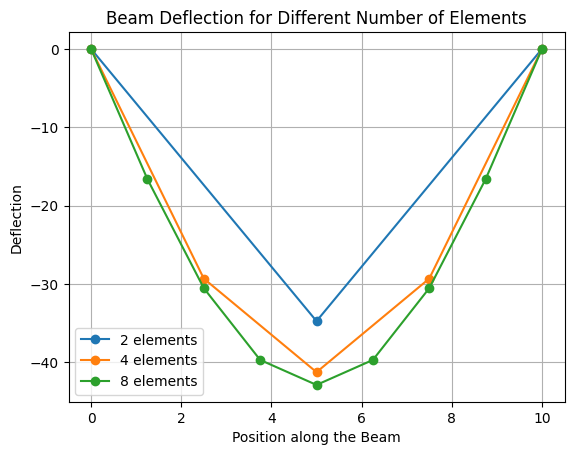

In [7]:
# Parametrs for the beam
L = 10  # Length of the beam
EI = 3  
q = 1   # Uniform load

def get_deflection(num_elements, L, EI, q):
    n_nodes = num_elements + 1
    le = L / num_elements  # Length of each element

    # Global stiffness matrix and force vector
    K_global = np.zeros((2 * n_nodes, 2 * n_nodes))
    F_global = np.zeros(2 * n_nodes)

    # Element stiffness matrix for a beam element (Euler-Bernoulli beam theory)
    Ke = (EI / le**3) * np.array([[12, 6*le, -12, 6*le],
                                  [6*le, 4*le**2, -6*le, 2*le**2],
                                  [-12, -6*le, 12, -6*le],
                                  [6*le, 2*le**2, -6*le, 4*le**2]])
    
    # Element force vector (due to uniform load q)
    Fe = (q * le / 2) * np.array([1, le/6, 1, le/6])

    # Assembly of global matrices
    for i in range(num_elements):
        # Global indices for the current element
        idx = [2*i, 2*i+1, 2*i+2, 2*i+3]

        # Assemble stiffness matrix
        K_global[np.ix_(idx, idx)] += Ke

        # Assemble force vector
        F_global[idx] += Fe

    # Apply boundary conditions (Simply supported: w=0, M=0)
    # first node
    K_global[0, :] = 0
    K_global[:, 0] = 0
    K_global[0, 0] = 1

    # last node
    K_global[-2, :] = 0
    K_global[:, -2] = 0
    K_global[-2, -2] = 1

    F_global[0] = 0     # w = 0 at the first node
    F_global[-2] = 0    # w = 0 at the last node

    # Solve the system of equations
    w = np.linalg.solve(K_global, F_global)

    # Extract deflection (w) from the displacement vector
    w_deflection = w[::2]

    return w_deflection

# Number of elements (try 2, 4, 8)

num_elements_list = [2, 4, 8]

for ne in num_elements_list:
    w_deflection = get_deflection(ne, L, EI, q)
    x = np.linspace(0, L, ne+1)
    plt.plot(x, -w_deflection, '-o', label=f'{ne} elements')

    # print deflection at nodes
    print(f'Number of elements: {ne}')
    print(f'Deflection at nodes: {w_deflection}')

# Plot formatting
plt.title('Beam Deflection for Different Number of Elements')
plt.xlabel('Position along the Beam')
plt.ylabel('Deflection')
plt.legend()
plt.grid(True)
plt.show()